In [2]:
%matplotlib notebook

from agent import DummyAgent, HumanAgent
from renju import run_test, Player

In [3]:
def pit(black, white):
    while True:
        result = run_test(black, white)
        if result == Player.BLACK:
            print('Black win')
        elif result == Player.WHITE:
            print('White win')
        else:
            print('Draw')


        is_ended = 0
        while True:
            ans = input('Play again? y/n')
            if ans == 'y':
                break
            elif ans == 'n':
                is_ended = 1
                break
            else:
                print('Invalid input. Eneter y/n')


        if is_ended:
            break


<IPython.core.display.Javascript object>


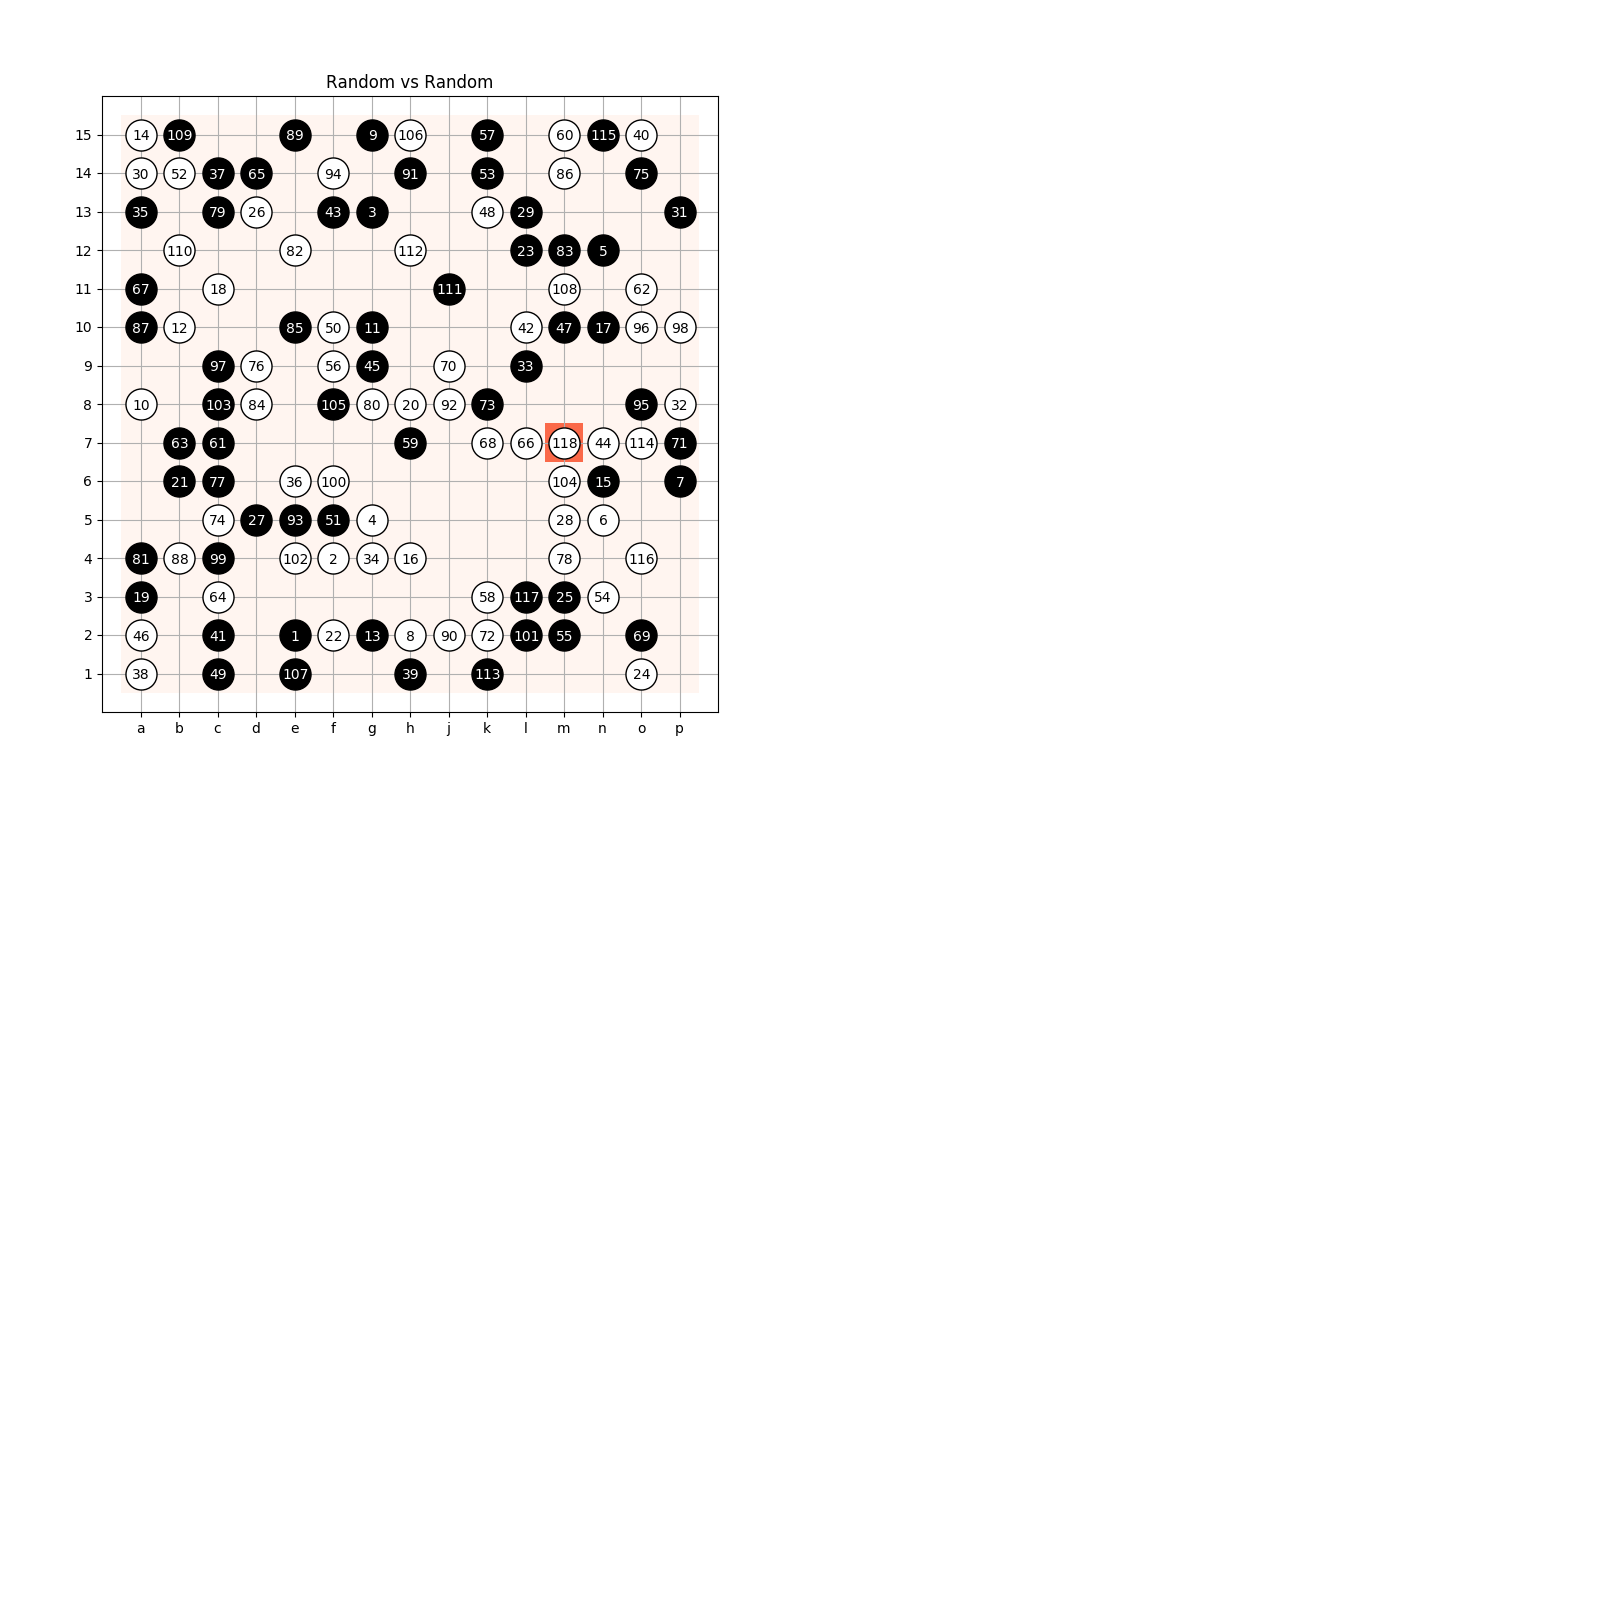

White win


In [ ]:
pit(DummyAgent('black'), DummyAgent('white'))